### Отбор наиболее важных признаков при помощи метода случайного леса

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from russian_names import russian_names

In [2]:
df_pr = pd.read_csv('data_processed.csv')
df_pr.head(10)

,Unnamed: 0,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,0,1,8,0.555556,2,1,13,4,6,10,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,1
1,1,1,2,0.111111,11,1,1,3,4,4,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.000000,0
2,2,1,1,0.555556,5,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.000000,1
3,3,1,8,0.222222,15,1,23,27,6,4,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.000000,0
4,4,2,12,0.111111,3,1,22,28,10,10,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.000000,0
5,5,2,12,0.111111,17,12,22,27,10,8,...,0.192308,0.628193,0.0,0.0,0.217391,0.515152,0.25,0.619231,0.416667,0
6,6,1,1,0.111111,12,1,13,28,8,11,...,0.269231,0.704636,0.0,0.0,0.347826,0.242424,0.40,0.772423,0.000000,0
7,7,1,9,0.444444,11,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.217391,0.151515,0.00,0.000000,0.000000,1
8,8,1,1,0.333333,10,1,1,1,10,10,...,0.230769,0.735099,0.0,0.0,0.260870,0.212121,0.30,0.761538,0.000000,0
9,9,1,1,0.111111,10,1,1,14,5,8,...,0.192308,0.603974,0.0,0.0,0.260870,0.424242,0.10,0.726923,0.000000,1


In [3]:
df_pr = df_pr.drop('Unnamed: 0', axis=1)
df_pr

,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,1,8,0.555556,2,1,13,4,6,10,1,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,1
1,1,2,0.111111,11,1,1,3,4,4,1,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.0,0
2,1,1,0.555556,5,1,22,27,10,10,1,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.0,1
3,1,8,0.222222,15,1,23,27,6,4,1,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.0,0
4,2,12,0.111111,3,1,22,28,10,10,0,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,0.666667,15,1,1,1,6,5,0,...,0.192308,0.720530,0.0,0.0,0.260870,0.242424,0.25,0.682051,0.0,0
4420,1,1,0.222222,15,1,1,1,10,10,1,...,0.230769,0.635762,0.0,0.0,0.260870,0.181818,0.10,0.592308,0.0,1
4421,1,1,0.111111,12,1,22,27,10,10,1,...,0.269231,0.790066,0.0,0.0,0.347826,0.272727,0.05,0.726923,0.0,1
4422,1,1,0.111111,9,1,22,27,8,5,1,...,0.192308,0.731126,0.0,0.0,0.217391,0.181818,0.25,0.646154,0.0,0


Разделение на обучающую, тестовую и валидационную выборки: 75%, 20%, 5%.

In [4]:
X = df_pr.copy()
# Отделить целевую переменную и записать ее в y
X = X.drop('Target', axis=1)
y = df_pr['Target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.0625, random_state=42, stratify=y_train)

In [7]:
X_train.shape

(3317, 27)

In [8]:
clf = RandomForestClassifier(n_estimators=100)
# Обучение модели
clf.fit(X_train,y_train)
# Вынести отсортированное влияние признаков
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Units 2 approved           0.169085
Units 2 grade              0.150951
Units 1 approved           0.083412
Units 1 grade              0.068061
Tuition fees up to date    0.061719
Age at enrollment          0.050862
Units 2 evaluations        0.045484
Course                     0.043399
Father's occupation        0.035387
Units 1 evaluations        0.030079
Mother's occupation        0.028475
Application mode           0.026735
Father's qualification     0.025560
Units 2 enrolled           0.025221
Mother's qualification     0.025035
Debtor                     0.022131
Units 1 enrolled           0.021243
Application order          0.015883
Gender                     0.013199
Scholarship holder         0.011509
Displaced                  0.009135
Units 1 credited           0.008680
Previous qualification     0.007606
Units 2 credited           0.006313
Units 2 non_eval           0.005781
Units 1 non_eval           0.004655
Marital status             0.004399
dtype: float64

Визуализация важности признаков

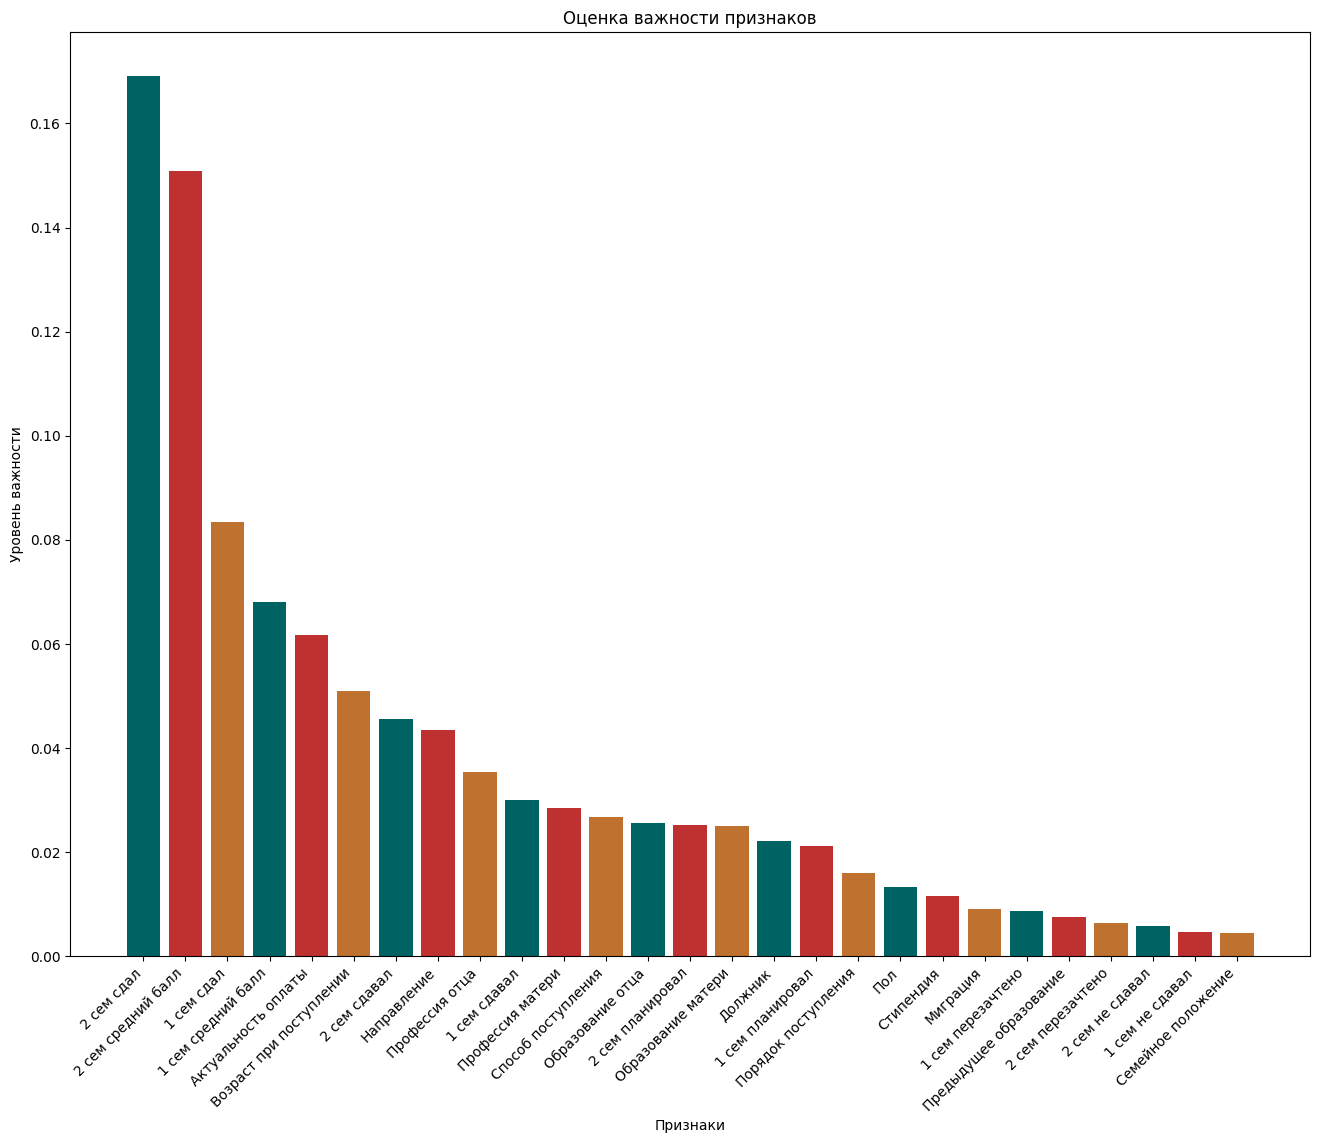

In [19]:
color=['#006363', '#BF3030', '#BF7130']
labels = [russian_names[column] for column in feature_imp.index]

plt.figure(figsize=(16,12))
plt.bar(feature_imp.index, feature_imp, color=color)

plt.title('Оценка важности признаков')
plt.xlabel('Признаки')
plt.ylabel('Уровень важности')

plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')

plt.show()